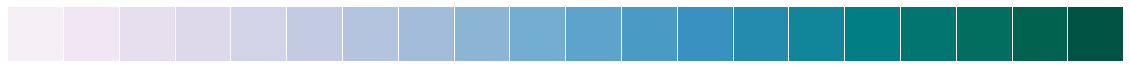

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid', color_codes=True)
%matplotlib inline

sns.palplot(sns.color_palette("PuBuGn", n_colors=20))


This data set is from the Pew Research Center and shows the results of a _[survey](http://www.pewinternet.org/dataset/march-2016-libraries/)_ regarding Internet use, Library use and reading habits of the respondents. 

_[In an article summarizing the data](http://www.pewinternet.org/2016/09/01/book-reading-2016-appendix-a/)_, the Research Center notes that, despite the existence of numerous reading tablets and devices, print readership still remained dominant. With a background in literature and experience consulting medieval manuscripts in Italy, I was interested in this preference for print amongst the slew of recently developed reading platforms. As such, I wanted to use this capstone project to look into the demographics of these readers, as well as how their level of internet use correlates to their preference for print materials over digital materials.  I will start with examining the demographics of these readers, thereafter moving on to investigate how use of technology may or may not influence their decision making.

In [243]:
data = pd.read_csv("April_4_2016_Libraries.csv")

all_data = pd.DataFrame(data)


In [186]:
# Those reading more than 20 books/year:
readers = all_data[all_data['books1'] > 20]

# Those who read printed books(not necessarily exclusively):
prints = all_data[all_data['books2a'] == '1']
audiobooks = all_data[all_data['books2b'] == '1']
ebooks = all_data[all_data['books2c'] == '1']

# # Counts of people who read various medias
medias = [prints, audiobooks, ebooks]
media_type = pd.concat(medias)
media_beta = media_type[['books2a', 'books2b', 'books2c']]

# Levels of internet use:
intuse = (all_data.where((all_data.intfreq <= '3' )&(all_data.intfreq >= '1'))).dropna()

# Sometimes feel stressed:
infostress1 = all_data[all_data['q2a'] == 1]

# Stress re institutional information:
infostress2 = all_data[all_data['q2c'] == 1]

# Definitely overloaded:
overload = all_data[all_data['q3'] == 1]

# Like the info:
like_info = all_data[all_data['q3'] == 2]
infostress_gen = all_data[all_data['q3'] < 8]

# App with message deleting:
snapchat = all_data[all_data['act128'] == '1']

# Anonymous App
anonapp = all_data[all_data['act129'] == '1']

# Frequent Twitter Users:
twitter = (all_data.where((all_data.sns2a == '1') | (all_data.sns2a == '2'))).dropna()

# Frequent Facebook Users:
facebook = (all_data.where((all_data.sns2e == '1') | (all_data.sns2e == '2'))).dropna()

# Reading Interests:
reader_interests = all_data[['q8a', 'q8b', 'q8c', 'q8d']]

# Information good or bad?:
infostatus = (all_data.where((all_data.q4 == 1) | (all_data.q4 == 2))).dropna()

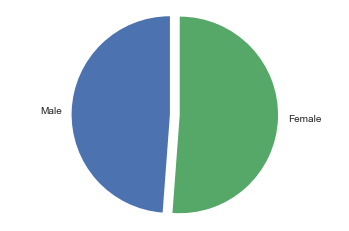

In [5]:
gender_breakdown = prints.groupby('sex').agg('count').reset_index()
explode = (0, 0.1)

plt.pie(gender_breakdown.books2a, explode = explode, labels = ['Male', 'Female'], startangle=90)
plt.axis('equal')
plt.show()


With this graph, I wanted to get an idea of how the preference for print was characterized by gender.  Here, you can see that the findings are pretty evenly spread.  There is a very slight majority of female readers who prefer paper-books.  It is important to note here that this category does not exclude respondents who *also* decided to read on other platforms. As such, we cannot deduce that the respondents visualized above read print exclusively, but instead that they did not *avoid* or *completely opt away from* print materials.

In [6]:
a = prints[prints.inc != 99]
b = prints[prints.inc != 98]

c = audiobooks[audiobooks.inc != 99]
d = audiobooks[audiobooks.inc != 98]

e = ebooks[ebooks.inc != 99]
f = ebooks[ebooks.inc != 98]

beta_b = a.merge(b)
beta_2 = pd.DataFrame(beta_b)

theta = c.merge(d)
theta_2 = pd.DataFrame(theta)

zeta = e.merge(f)
zeta_2 = pd.DataFrame(zeta)


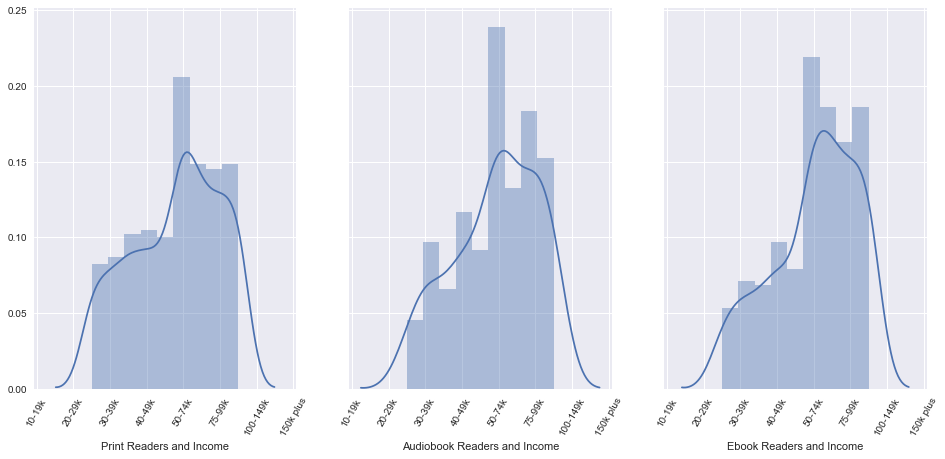

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 7), sharex = True, sharey = True)


sns.distplot(beta_2.inc, ax = ax1, bins = 9, axlabel = "Print Readers and Income").set_xticklabels(['< 10k', '10-19k', '20-29k', '30-39k', '40-49k', '50-74k', '75-99k', '100-149k', '150k plus'], rotation = 60)


sns.distplot(theta_2.inc, ax = ax2, bins = 9, axlabel = "Audiobook Readers and Income").set_xticklabels(['< 10k', '10-19k', '20-29k', '30-39k', '40-49k', '50-74k', '75-99k', '100-149k', '150k plus'], rotation = 60)


sns.distplot(zeta_2.inc, ax = ax3, bins = 9, axlabel = "Ebook Readers and Income").set_xticklabels(['< 10k', '10-19k', '20-29k', '30-39k', '40-49k', '50-74k', '75-99k', '100-149k', '150k plus'], rotation = 60)

plt.show()






Here, I thought it would be interesting to compare the income levels of those who read books in different formats.  Based on these graphs, there really isn't too much of a distinction, aside from the fact that electronic platforms (Audiobooks and Ebooks) have a greater dispartity in income when compared to those who read print books (something that was also noted in the article mentioned above).  Again, there could be some overlap here, so this is not conclusive, but there is a slight difference in this set of data.